In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
file = pd.read_csv('events.csv',low_memory=False)

In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [4]:
compras = file.loc[file.event=='conversion']

In [5]:
visited = file.loc[file.event=='visited site'].loc[file['region']!='Unknown']

In [6]:
group = visited.groupby('person')

In [7]:
def region(x):
    return x['region'].unique()[0]

regiones = group.apply(region)

In [8]:
regiones = regiones.reset_index()

In [9]:
regiones['compro'] = regiones['person'].isin(compras['person'])

In [10]:
regiones.head(3)

,person,0,compro
0,0004b0a2,Pernambuco,False
1,0006a21a,Rio de Janeiro,False
2,000a54b2,Rio de Janeiro,False


In [11]:
regiones.columns=['person','region','compro']

In [12]:
regiones['region'].value_counts()

Sao Paulo                           7860
Minas Gerais                        2315
Rio de Janeiro                      2299
Bahia                               1747
Ceara                                882
Parana                               882
Pernambuco                           872
Rio Grande do Sul                    846
Santa Catarina                       577
Federal District                     533
Goias                                486
Maranhao                             447
Para                                 423
Espirito Santo                       411
Rio Grande do Norte                  357
Paraíba                              278
Amazonas                             254
Piaui                                250
Alagoas                              226
Mato Grosso do Sul                   181
Mato Grosso                          178
California                           156
Sergipe                              155
Tocantins                            145
Rondonia        

In [13]:
compras_map = regiones.groupby('region').agg({'compro':'sum'})

In [14]:
compras_map.sort_values('compro',ascending=False).head(3)

,compro
region,
Sao Paulo,200.0
Minas Gerais,73.0
Rio de Janeiro,53.0


In [18]:
brazil = gpd.read_file('maps/gadm36_BRA_1.shp')

In [19]:
brazil.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,BRA,Brazil,BRA.1_1,Acre,None,None,Estado,State,None,BR.AC,"POLYGON ((-68.10552979000001 -10.72191715, -68..."
1,BRA,Brazil,BRA.2_1,Alagoas,None,None,Estado,State,None,BR.AL,"(POLYGON ((-35.88986206 -9.844305990000001, -3..."
2,BRA,Brazil,BRA.3_1,Amapá,None,None,Estado,State,None,BR.AP,"(POLYGON ((-50.82569504 2.522084, -50.82569504..."
3,BRA,Brazil,BRA.4_1,Amazonas,Amazone,None,Estado,State,None,BR.AM,"POLYGON ((-58.13698959 -7.35613918, -58.136821..."
4,BRA,Brazil,BRA.5_1,Bahia,Ba¡a,None,Estado,State,None,BR.BA,"(POLYGON ((-38.69208145 -17.95958328, -38.6920..."


In [20]:
brazil = brazil.set_index('NAME_1')

In [21]:
brazil.index

Index(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará', 'Paraíba',
       'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
       'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'],
      dtype='object', name='NAME_1')

In [22]:
brazil.index = ['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Federal District', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Para', 'Paraíba',
       'Parana', 'Pernambuco', 'Piaui', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondonia', 'Roraima',
       'Santa Catarina', 'Sao Paulo', 'Sergipe', 'Tocantins']

In [23]:
brazil['compras'] = compras_map

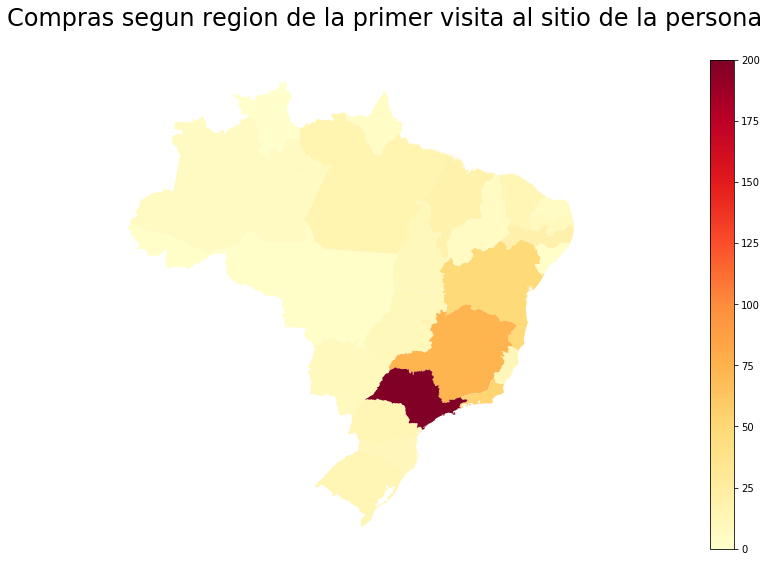

In [34]:
fig, ax = plt.subplots(1, figsize=(15, 9))
ax.axis('off')
plt.title('Compras segun region de la primer visita al sitio de la persona\n',size=24)
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=0, vmax=200))
sm._A = []
cbar = fig.colorbar(sm)
g = brazil.plot(column='compras',cmap='YlOrRd',ax=ax)